## Decision Tree
titanic Dtaset

In [1]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
data = pd.read_csv('/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# surviveed is y
data.info()

- Age has NaN for Many as we have 714 enteries only.
    - Substitute missing values from mean or median (data imputation) - {inbuilt class in sklearn also}
- embarked means from point they boarded
- It is possible that is does not depend on embarked and name.
- Fare , age will be kept 
- cabin has many NaN values so it can be discarded aslo we can keep a track of person's cbin by the fare price.

In [4]:
columns_to_Drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

data_clean = data.drop(columns_to_Drop,axis=1)

In [5]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
# One of our class - Sex is in string format
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [7]:
data_clean.head()
# All males have label 1 and female 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [8]:
data_clean.info()
# Fill all age values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [9]:
data_clean = data_clean.fillna?
# Fills na with specified values

In [10]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [11]:
data_clean.info()
# All have 891 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [12]:
# Access a particular row
data_clean.loc[2][1]

3.0

In [13]:
data_clean.loc[1]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [14]:
input_col = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_col = ["Survived"]

X = data_clean[input_col]
Y = data_clean[output_col]

print(X.shape,Y.shape)

(891, 6) (891, 1)


### Decision Tree Implementation

#### define entropy and information gain

In [15]:
def entropy(col):
    
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    entropy = 0.0
    
    for i in counts[1]:
        p = i/N
        entropy += (-1.0 * p * np.log2(p))
    
    return entropy

In [ ]:
c = np.array([1,1,1,0,0,0])
entropy(c)

1.0

In [16]:
def divide_data(x_data,fkey,fval):
    # work with Pandas dataframe
    # creating 2 empty dataframe
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for i in range(x_data.shape[0]):
        val = x_data[fkey].loc[i]
        if val > fval:
            x_right = x_right.append(x_data.loc[i])
        else:
            x_left = x_left.append(x_data.loc[i])
    
    return x_left,x_right

In [ ]:
x_left,x_right = divide_data(data_clean[:10],'Sex',0.5)
print(x_left)
print(x_right)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [17]:
def information_gain(x_data,fkey,fval):
    # Split data 
    left,right = divide_data(x_data,fkey,fval)
    # we will compute reduction in entropy after this entropy
    # % fo people on left and right
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    # All examples can come to one side
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -1000000 # Min information Gain
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived) + r*entropy(right.Survived))
    return i_gain

In [18]:
# Test Function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137916
Fare
0.042140692838995464


First node will be Sex as it has maximum ig.

In [19]:
class DecisionTree:
    
    # Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    
    def train(self,X_train):
        
        features = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
        info_gain = []
        
        for i in features:
            i_gain = information_gain(X_train,i,X_train[i].mean())
            info_gain.append(i_gain)
        
        self.fkey = features[np.argmax(info_gain)]
        self.fval = X_train[self.fkey].mean()
        print("Making tree Feature is",self.fkey)
        # Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # we have reached leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] ==0 :
            if X_train.Survived.mean() >=0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        
        # Stop early when depth >=maxDepth
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >=0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        # Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        # Setting Target at every node
        if X_train.Survived.mean() >=0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            # right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [20]:
d = DecisionTree()
d.train(data_clean)

Making tree Feature is Sex
Making tree Feature is Pclass
Making tree Feature is Pclass
Making tree Feature is Parch
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Parch
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is Parch
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is SibSp
Making tree Feature is Fare
Making tree Feature is Fare
Making tree Feature is Age
Making tree Feature is SibSp
Making tree Feature is Parch
Making tree Feature is Age
Making tree Feature is SibSp
Making tree Feature is Fare
Making tree Feature is Parch
Making tree Feature is Parch
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is Parch
Making tree Feature is Pclass
Making tree Feature 

In [21]:
m = [1,2,3,4,5]
n = np.random.choice(m,4,replace=True)
n2 =np.random.choice(m,3,replace=False)
print(n,n2,m)

[4 1 4 4] [4 1 5] [1, 2, 3, 4, 5]


#### Some of the features can repeat as they are used in different branches

#### Train-Validation-Test Set split

In [22]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [23]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [25]:
dt = DecisionTree()

In [26]:
dt.train(train_data)

Making tree Feature is Sex
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is SibSp
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is SibSp
Making tree Feature is Parch
Making tree Feature is Pclass
Making tree Feature is SibSp
Making tree Feature is Fare
Making tree Feature is Parch
Making tree Feature is Age
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Parch
Making tree Feature is SibSp
Making tree Feature is Fare
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is Age
Making tree Feature is Parch
Making tree Feature is Fare
Making tree Feature is Fare
Making tree Feature is Fare
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is Parch
Making tree Feature is Fare
Making tree Feat

In [27]:
print(dt.fkey)

Sex


In [28]:
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

0.6292134831460674
Pclass
Fare


In [29]:
y_pred = []
for i in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[i]))

In [30]:
y_pred
# Array of dead and survived

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',


In [31]:
y_actual = test_data[output_col]

In [32]:
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [33]:
# dead = 0 
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [34]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [35]:
print(y_pred.shape,y_actual.shape)

(268,) (268, 1)


In [36]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape,y_actual.shape)

(268, 1) (268, 1)


In [38]:
acc = np.sum((y_pred == y_actual))/y_pred.shape[0]
print(acc)

Survived    0.817164
dtype: float64


In [39]:
def boostraping(X,n_bootstrap):
    index = np.random.randint(low=0, high=len(X), size=n_bootstrap)
    data = X.iloc[index]
    data = data.reset_index(drop=True)
    return data

class Random_Forest:
    def __init__(self,n_trees=5,n_bootstrap=100,max_depth=5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.forest = []
        self.n_bootstrap=n_bootstrap
        
    def training(self,X):
        self.forest = []
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            x = boostraping(X,n_bootstrap=self.n_bootstrap)
            tree.train(x)
            self.forest.append(tree)

    def predict(self,X):
        tree_predicted = np.array([tree.predict(X) for tree in self.forest])
        return tree_predicted

In [40]:
rf_scratch = Random_Forest()

In [41]:
y_actual = test_data[output_col]

In [42]:
rf_scratch.training(train_data)

Making tree Feature is Sex
Making tree Feature is Pclass
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Pclass
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Pclass
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Parch
Making tree Feature is SibSp
Making tree Feature is Age
Making tree Feature is Fare
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is SibSp
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Age
Making tree Feature is Pclass
Making tree Feature is Age
Making tree Feature is Pclass
Making tree Feature is Pclass
Making tree Feature is Parch
Making tree Feature is Fare
Making tree Feature is Pclass
Making tree 

In [43]:
m =np.array(rf_scratch.predict(test_data.loc[1]))
le = LabelEncoder()
m = le.fit_transform(m)
np.bincount(m).argmax()

0

In [44]:
y_pred = []
for i in range(test_data.shape[0]):
    m =np.array(rf_scratch.predict(test_data.loc[i]))
    le = LabelEncoder()
    m = le.fit_transform(m)
    y_pred.append(np.bincount(m).argmax())

In [45]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
y_pred = np.array(y_pred)

In [47]:
y_actual = y_actual.values

In [49]:
len(y_actual)

268

In [50]:
len(y_pred)

268

In [53]:
y_actual.shape

(268, 1)

In [54]:
y_pred.shape

(268,)

In [55]:
y_pred = y_pred.reshape((-1,1))

In [56]:
y_pred.shape

(268, 1)

In [57]:
acc = np.sum((y_pred == y_actual))/len(y_actual)
print(acc)

0.7089552238805971


#### Decision Tree Using Sklearn

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
sk_tree = DecisionTreeClassifier?

In [60]:
sk_tree = DecisionTreeClassifier

In [61]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [62]:
sk_tree.fit(train_data[input_col],train_data[output_col])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
sk_tree.predict(test_data[input_col])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [64]:
sk_tree.score(test_data[input_col],test_data[output_col])

0.8283582089552238

In [65]:
DecisionTreeClassifier?

## Visualizing a decision tree

In [66]:
import pydotplus

In [67]:
from io import StringIO  
from IPython.display import Image
from sklearn import tree
import pydot
from sklearn.tree import export_graphviz

In [68]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

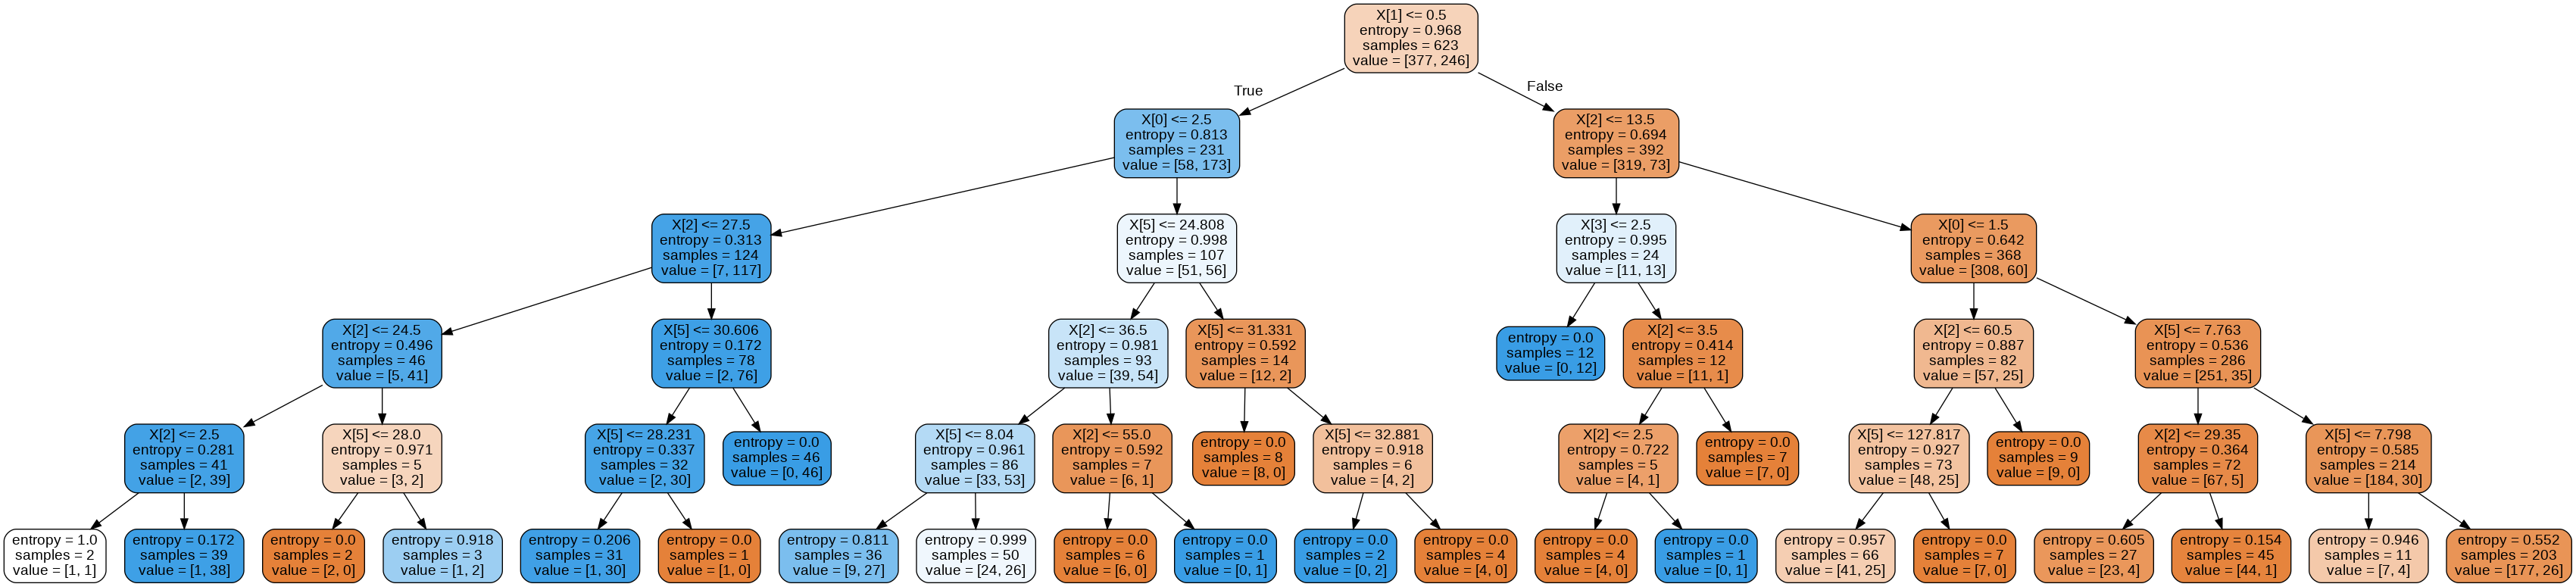

In [69]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [70]:
import matplotlib.pyplot as plt

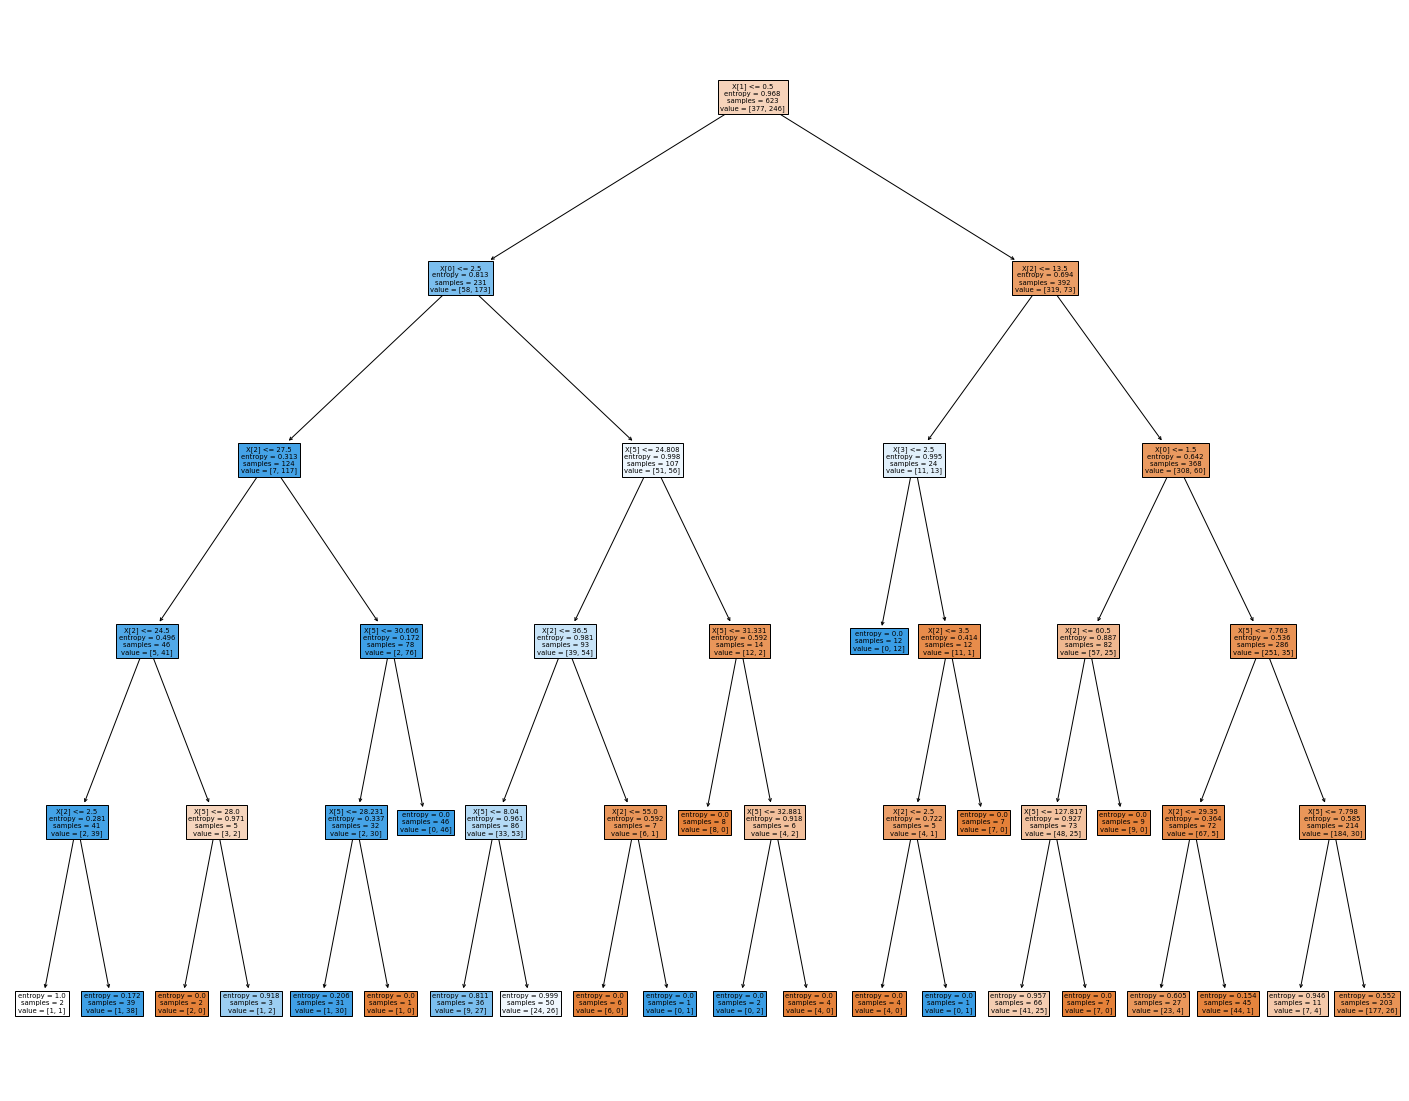

In [71]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(sk_tree,filled=True)

## Random forests

#### Overfitting

In [72]:
X_train = train_data[input_col]
Y_train = np.array(train_data[output_col]).reshape((-1,))
X_test = test_data[input_col]
Y_test = np.array(test_data[output_col]).reshape((-1,))

In [73]:
sk_tree = DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9823434991974318

In [74]:
sk_tree.score(X_test,Y_test)

0.7798507462686567

In [75]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [76]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [77]:
## Learn multiple such trees
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier?

In [79]:
rf = RandomForestClassifier

In [80]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
rf.score(X_train,Y_train)

0.85553772070626

In [84]:
rf.score(X_test,Y_test)

0.832089552238806

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
acc = cross_val_score(RandomForestClassifier(n_estimators=10,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [85]:
print(acc)

0.8041548387096775


In [86]:
acc = cross_val_score(RandomForestClassifier(n_estimators=5,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()
print(acc)

0.7977290322580645


In [87]:
acc = cross_val_score(RandomForestClassifier(n_estimators=50,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()
print(acc)

0.8201548387096775


In [88]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [ ]:
acc_list

[0.775225806451613,
 0.7897161290322581,
 0.780141935483871,
 0.8105290322580645,
 0.8105806451612902,
 0.7978064516129033,
 0.7993419354838709,
 0.8025161290322581,
 0.8185548387096773,
 0.8250580645161291,
 0.8009548387096774,
 0.8185161290322579,
 0.8121548387096773,
 0.8169548387096773,
 0.8089161290322581,
 0.8041806451612903,
 0.8025548387096775,
 0.8137677419354838,
 0.8105161290322581,
 0.8153419354838709,
 0.8024903225806451,
 0.8057290322580645,
 0.7961548387096774,
 0.8089161290322581,
 0.8201935483870967,
 0.8249935483870967,
 0.8233806451612903,
 0.8185935483870967,
 0.7961032258064515,
 0.8153290322580645,
 0.8009419354838709,
 0.8217806451612903,
 0.8041419354838709,
 0.8233677419354839,
 0.8169548387096773,
 0.8089548387096773,
 0.8121677419354839,
 0.8265677419354839,
 0.8170193548387097,
 0.8185419354838709,
 0.8185677419354839,
 0.8249935483870967,
 0.8153548387096773,
 0.8153419354838711,
 0.8217548387096774,
 0.8153419354838709,
 0.8073548387096773,
 0.812154838709

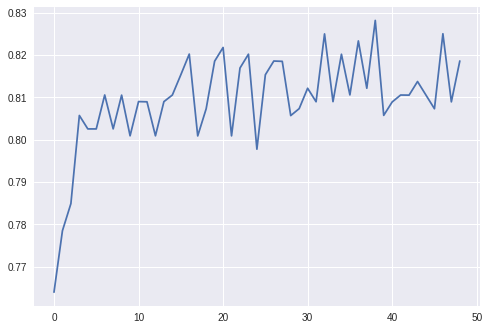

In [89]:
plt.style.use('seaborn')
plt.plot(acc_list)

In [90]:
print(np.argmax(acc_list))

38


In [91]:
test_acc = rf = RandomForestClassifier(n_estimators=28,criterion='entropy',max_depth=5)
rf.fit(X_test,Y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=28,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
rf.score(X_train,Y_train)

0.8089887640449438

In [93]:
rf.score(X_test,Y_test)

0.917910447761194